# **Module 4: Spatial Dependence and Regression**

In [1]:
# general use packages
import numpy as np
import matplotlib.pyplot as plt


# geospatial packages
import geopandas as gpd
from pysal.lib import weights
from spreg import ML_Lag, ML_Error, OLS
from splot.libpysal import plot_spatial_weights
import esda 
from splot.esda import plot_moran

import os
os.environ['PROJ_LIB'] = '/opt/conda/envs/user_default/share/proj'

/home/u01000486/.local/lib/python3.11/site-packages/libpysal/cg/alpha_shapes.py:38: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/home/u01000486/.local/lib/python3.11/site-packages/libpysal/cg/alpha_shapes.py:164: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/home/u01000486/.local/lib/python3.11/site-packages/libpysal/cg/alpha_shapes.py:198: NumbaDep

## Exercises
For the exercies, data are created and saved to the directory `./data-module-4/`.
- `mwi.shp` -  a dataset downloaded from the Malawi Living Standard Measurement Survey Integrated Household Sample (LSMS-IHS) Data Wave 5 Data (available from https://microdata.worldbank.org/index.php/catalog/3818).

**Question 1. Read the vector dataset `mwi.shp` into a `GeoDataFrame`. Print its Coordinate Reference System.**

In [2]:
mwi = gpd.read_file("./data-module-4/mwi.shp")
print (mwi.crs)

EPSG:20935


**Question 2. Calculate neighboring using Queen's case (contiguity), Rook's case (contiguity), K-nearest neighbors (k=3), and distance (200,000 m). Print the properties for each neighbouring, such as number of units, number of nonzero weights, etc.**

In [3]:
# calculate neighboring using Queen's case (contiguity)
mwi_nbq = weights.contiguity.Queen.from_dataframe(mwi)
# summarize 
print ("Number of units: {}".format(mwi_nbq.n))
print ("Number of nonzero weights: {}".format(mwi_nbq.nonzero))
print ("Percentage of nonzero weights: {}".format(mwi_nbq.pct_nonzero))
print ("Average number of neighbors: {}".format(mwi_nbq.mean_neighbors))
print ("Largest number of neighbors is {}".format(mwi_nbq.max_neighbors))
print ("Minimum number of neighbors is {}".format(mwi_nbq.min_neighbors))
print ("Number of units without any neighbors {}".format(len(mwi_nbq.islands)))
print ("Histogram: {}".format(mwi_nbq.histogram))
print ("Neighbour list: {}".format(mwi_nbq.neighbors))

Number of units: 31
Number of nonzero weights: 124
Percentage of nonzero weights: 12.903225806451612
Average number of neighbors: 4.0
Largest number of neighbors is 8
Minimum number of neighbors is 1
Number of units without any neighbors 0
Histogram: [(1, 1), (2, 8), (3, 2), (4, 7), (5, 7), (6, 5), (7, 0), (8, 1)]
Neighbour list: {0: [13, 19, 23, 12, 29], 1: [2, 3, 4, 19, 28, 29], 2: [1, 4, 28], 3: [16, 1, 19, 22, 28], 4: [1, 2, 28, 29, 15], 5: [8, 26], 6: [10, 27, 13, 23], 7: [24, 27, 10, 11, 9], 8: [26, 5], 9: [17, 21, 7, 24, 10, 14], 10: [6, 7, 27, 9, 11, 14], 11: [10, 7], 12: [0, 13, 29], 13: [0, 12, 6, 23], 14: [9, 10], 15: [25, 29, 4, 28], 16: [3, 19], 17: [18, 20, 21, 9, 26], 18: [17, 20], 19: [0, 1, 16, 3, 23, 29], 20: [17, 18, 26, 21], 21: [17, 20, 24, 9, 27], 22: [3, 28], 23: [0, 19, 13, 6], 24: [9, 27, 21, 7], 25: [29, 15], 26: [8, 17, 20, 5], 27: [21, 6, 7, 24, 10], 28: [1, 2, 3, 4, 22, 15], 29: [0, 1, 4, 12, 15, 19, 25, 30], 30: [29]}


In [4]:
# calculate neighboring using Rook's case (contiguity)
mwi_nbr = weights.contiguity.Rook.from_dataframe(mwi)
# summarize 
print ("Number of units: {}".format(mwi_nbr.n))
print ("Number of nonzero weights: {}".format(mwi_nbr.nonzero))
print ("Percentage of nonzero weights: {}".format(mwi_nbr.pct_nonzero))
print ("Average number of neighbors: {}".format(mwi_nbr.mean_neighbors))
print ("Largest number of neighbors is {}".format(mwi_nbr.max_neighbors))
print ("Minimum number of neighbors is {}".format(mwi_nbr.min_neighbors))
print ("Number of units without any neighbors {}".format(len(mwi_nbr.islands)))
print ("Histogram: {}".format(mwi_nbr.histogram))
print ("Neighbour list: {}".format(mwi_nbr.neighbors))

Number of units: 31
Number of nonzero weights: 124
Percentage of nonzero weights: 12.903225806451612
Average number of neighbors: 4.0
Largest number of neighbors is 8
Minimum number of neighbors is 1
Number of units without any neighbors 0
Histogram: [(1, 1), (2, 8), (3, 2), (4, 7), (5, 7), (6, 5), (7, 0), (8, 1)]
Neighbour list: {0: [13, 19, 23, 12, 29], 1: [2, 19, 4, 3, 28, 29], 2: [1, 4, 28], 3: [16, 1, 19, 22, 28], 4: [1, 2, 28, 29, 15], 5: [8, 26], 6: [10, 27, 13, 23], 7: [24, 27, 10, 11, 9], 8: [26, 5], 9: [17, 21, 7, 24, 10, 14], 10: [6, 7, 11, 9, 27, 14], 11: [10, 7], 12: [0, 29, 13], 13: [0, 12, 6, 23], 14: [9, 10], 15: [25, 29, 4, 28], 16: [19, 3], 17: [18, 20, 21, 9, 26], 18: [17, 20], 19: [0, 1, 16, 3, 23, 29], 20: [17, 18, 26, 21], 21: [17, 20, 24, 9, 27], 22: [3, 28], 23: [0, 19, 13, 6], 24: [9, 27, 21, 7], 25: [29, 15], 26: [8, 17, 20, 5], 27: [21, 6, 7, 24, 10], 28: [1, 2, 3, 4, 22, 15], 29: [0, 1, 4, 12, 15, 19, 25, 30], 30: [29]}


In [5]:
# calculate neighboring using K-nearest neighbors (distance-based)
mwi_nbk3 = weights.distance.KNN.from_dataframe(mwi, k=3)
# summarize 
print ("Number of units: {}".format(mwi_nbk3.n))
print ("Number of nonzero weights: {}".format(mwi_nbk3.nonzero))
print ("Percentage of nonzero weights: {}".format(mwi_nbk3.pct_nonzero))
print ("Average number of neighbors: {}".format(mwi_nbk3.mean_neighbors))
print ("Largest number of neighbors is {}".format(mwi_nbk3.max_neighbors))
print ("Minimum number of neighbors is {}".format(mwi_nbk3.min_neighbors))
print ("Number of units without any neighbors {}".format(len(mwi_nbk3.islands)))
print ("Histogram: {}".format(mwi_nbk3.histogram))
print ("Neighbour list: {}".format(mwi_nbk3.neighbors))

Number of units: 31
Number of nonzero weights: 93
Percentage of nonzero weights: 9.67741935483871
Average number of neighbors: 3.0
Largest number of neighbors is 3
Minimum number of neighbors is 3
Number of units without any neighbors 0
Histogram: [(3, 31)]
Neighbour list: {0: [23, 30, 12], 1: [2, 4, 19], 2: [4, 1, 28], 3: [28, 2, 16], 4: [2, 1, 15], 5: [8, 26, 18], 6: [27, 11, 10], 7: [24, 11, 10], 8: [5, 26, 18], 9: [24, 21, 7], 10: [11, 7, 6], 11: [10, 7, 6], 12: [29, 0, 30], 13: [23, 12, 0], 14: [10, 7, 11], 15: [25, 4, 28], 16: [19, 1, 2], 17: [20, 18, 26], 18: [20, 17, 26], 19: [16, 1, 2], 20: [18, 17, 26], 21: [24, 9, 7], 22: [28, 3, 15], 23: [0, 13, 19], 24: [7, 21, 9], 25: [15, 29, 30], 26: [18, 8, 20], 27: [6, 7, 11], 28: [2, 4, 15], 29: [30, 25, 4], 30: [29, 4, 0]}


/home/u01000486/.local/lib/python3.11/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)


In [6]:
# calculate neighboring by distance (distance-based)
mwi_nbd = weights.distance.DistanceBand.from_dataframe(mwi, 200000, binary=True)
# summarize 
print ("Number of units: {}".format(mwi_nbd.n))
print ("Number of nonzero weights: {}".format(mwi_nbd.nonzero))
print ("Percentage of nonzero weights: {}".format(mwi_nbd.pct_nonzero))
print ("Average number of neighbors: {}".format(mwi_nbd.mean_neighbors))
print ("Largest number of neighbors is {}".format(mwi_nbd.max_neighbors))
print ("Minimum number of neighbors is {}".format(mwi_nbd.min_neighbors))
print ("Number of units without any neighbors {}".format(len(mwi_nbd.islands)))
print ("Histogram: {}".format(mwi_nbd.histogram))
print ("Neighbour list: {}".format(mwi_nbd.neighbors))

Number of units: 31
Number of nonzero weights: 404
Percentage of nonzero weights: 42.039542143600414
Average number of neighbors: 13.03225806451613
Largest number of neighbors is 20
Minimum number of neighbors is 4
Number of units without any neighbors 0
Histogram: [(4, 1), (5, 2), (6, 0), (7, 2), (8, 2), (9, 0), (10, 1), (11, 2), (12, 4), (13, 1), (14, 1), (15, 3), (16, 7), (17, 0), (18, 0), (19, 4), (20, 1)]
Neighbour list: {0: [1, 2, 3, 4, 6, 10, 11, 12, 13, 15, 16, 19, 22, 23, 25, 27, 28, 29, 30], 1: [0, 2, 3, 4, 6, 12, 13, 15, 16, 19, 22, 23, 25, 28, 29, 30], 2: [0, 1, 3, 4, 6, 12, 13, 15, 16, 19, 22, 23, 25, 28, 29, 30], 3: [0, 1, 2, 4, 12, 15, 16, 19, 22, 23, 25, 28, 29, 30], 4: [0, 1, 2, 3, 6, 12, 13, 15, 16, 19, 22, 23, 25, 28, 29, 30], 5: [8, 18, 20, 26], 6: [0, 1, 2, 4, 7, 9, 10, 11, 12, 13, 14, 16, 19, 21, 23, 24, 27, 29, 30], 7: [6, 9, 10, 11, 13, 14, 21, 23, 24, 27], 8: [5, 17, 18, 20, 26], 9: [6, 7, 10, 11, 14, 17, 18, 20, 21, 24, 27], 10: [0, 6, 7, 9, 11, 13, 14, 19, 21

**Question 3. Visualize and compare all 4 weights networks. What differences do you see?**

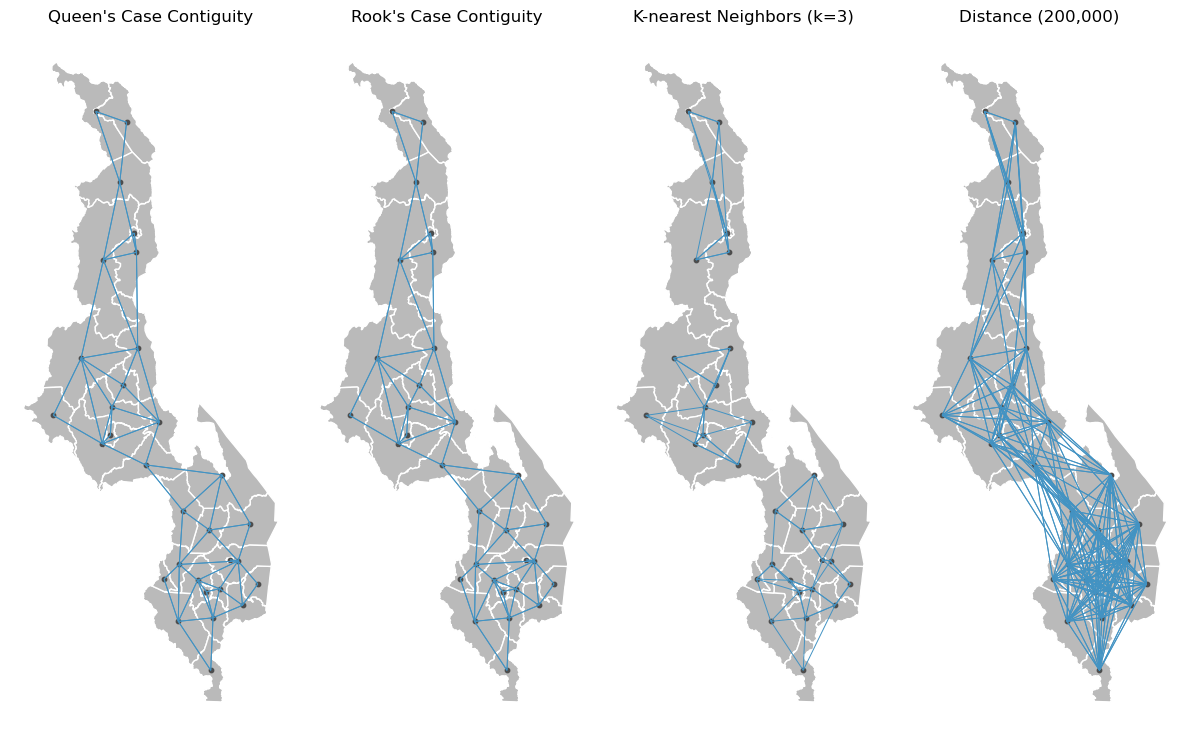

In [7]:
fig, axs = plt.subplots(1, 4, figsize=(12, 8))
plot_spatial_weights(mwi_nbq, mwi, ax=axs[0])
axs[0].set_title("Queen's Case Contiguity")
plot_spatial_weights(mwi_nbr, mwi, ax=axs[1])
axs[1].set_title("Rook's Case Contiguity")
plot_spatial_weights(mwi_nbk3, mwi, ax=axs[2])
axs[2].set_title("K-nearest Neighbors (k=3)")
plot_spatial_weights(mwi_nbd, mwi, ax=axs[3])
axs[3].set_title("Distance (200,000)")
plt.tight_layout()

**Question 4. Apply row-standardized and binary transforms to your Queen's case neighbourhood. Compare their summaries.**

In [8]:
# Spatial Weights Summary - Row Standardized
mwi_nbq.set_transform("R")
mwi_nbq_lw_r = mwi_nbq.to_adjlist()
print ("Property s0 = {}".format(mwi_nbq.s0))
print ("Property s1 = {}".format(mwi_nbq.s1))
print ("Property s2 = {}".format(mwi_nbq.s2))
print ("Weights: {}".format(mwi_nbq.weights))
print ("Weights summary: ")
print (mwi_nbq_lw_r["weight"].describe())

Property s0 = 31.0
Property s1 = 17.241388888888892
Property s2 = 133.32555555555552
Weights: {0: [0.2, 0.2, 0.2, 0.2, 0.2], 1: [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666], 2: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], 3: [0.2, 0.2, 0.2, 0.2, 0.2], 4: [0.2, 0.2, 0.2, 0.2, 0.2], 5: [0.5, 0.5], 6: [0.25, 0.25, 0.25, 0.25], 7: [0.2, 0.2, 0.2, 0.2, 0.2], 8: [0.5, 0.5], 9: [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666], 10: [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666], 11: [0.5, 0.5], 12: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], 13: [0.25, 0.25, 0.25, 0.25], 14: [0.5, 0.5], 15: [0.25, 0.25, 0.25, 0.25], 16: [0.5, 0.5], 17: [0.2, 0.2, 0.2, 0.2, 0.2], 18: [0.5, 0.5], 19: [0.16666666666666666, 0.16666666666666666,

In [9]:
# Spatial Weights Summary - Binary
mwi_nbq.set_transform("B")
mwi_nbq_lw_b = mwi_nbq.to_adjlist()
print ("Property s0 = {}".format(mwi_nbq.s0))
print ("Property s1 = {}".format(mwi_nbq.s1))
print ("Property s2 = {}".format(mwi_nbq.s2))
print ("Weights: {}".format(mwi_nbq.weights))
print ("Weights summary: ")
print (mwi_nbq_lw_b["weight"].describe())

Property s0 = 124.0
Property s1 = 248.0
Property s2 = 2328.0
Weights: {0: [1.0, 1.0, 1.0, 1.0, 1.0], 1: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 2: [1.0, 1.0, 1.0], 3: [1.0, 1.0, 1.0, 1.0, 1.0], 4: [1.0, 1.0, 1.0, 1.0, 1.0], 5: [1.0, 1.0], 6: [1.0, 1.0, 1.0, 1.0], 7: [1.0, 1.0, 1.0, 1.0, 1.0], 8: [1.0, 1.0], 9: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 11: [1.0, 1.0], 12: [1.0, 1.0, 1.0], 13: [1.0, 1.0, 1.0, 1.0], 14: [1.0, 1.0], 15: [1.0, 1.0, 1.0, 1.0], 16: [1.0, 1.0], 17: [1.0, 1.0, 1.0, 1.0, 1.0], 18: [1.0, 1.0], 19: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 20: [1.0, 1.0, 1.0, 1.0], 21: [1.0, 1.0, 1.0, 1.0, 1.0], 22: [1.0, 1.0], 23: [1.0, 1.0, 1.0, 1.0], 24: [1.0, 1.0, 1.0, 1.0], 25: [1.0, 1.0], 26: [1.0, 1.0, 1.0, 1.0], 27: [1.0, 1.0, 1.0, 1.0, 1.0], 28: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 29: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 30: [1.0]}
Weights summary: 
count    124.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max       

**Question 5. Run the Moran's I statistic to test the spatial autocorrelation for `poverty` variable. Use Queen's case neighbouring structure.**

In [10]:
mi = esda.moran.Moran(mwi["poverty"], mwi_nbq)
print("Moran's I statistic: {}".format(mi.I))
print("p-value of I under randomization assumption: {}".format(mi.p_rand))
print ("variance of I under randomization assumption: {}".format(mi.VI_rand))
print ("Expected value under normality assumption: {}".format(mi.EI))

Moran's I statistic: 0.4370772486047056
p-value of I under randomization assumption: 7.561642504113383e-05
variance of I under randomization assumption: 0.014126282197582017
Expected value under normality assumption: -0.03333333333333333


**Question 6. Visualize Moran's I plot for `poverty` variable.**

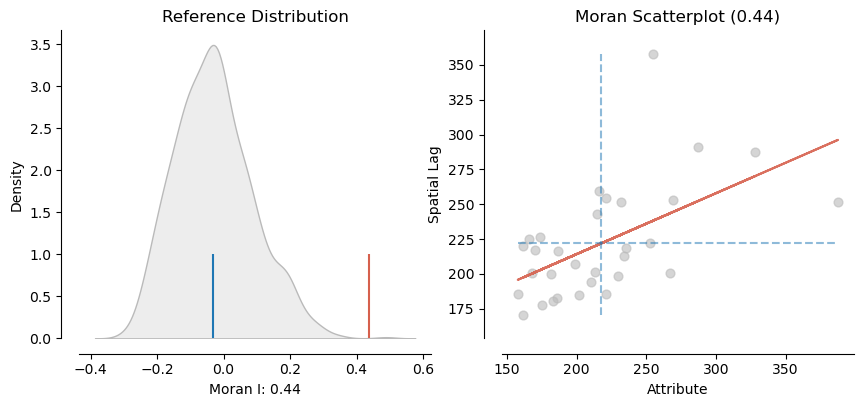

In [13]:
plot_moran(mi, zstandard=False, shade=None, fill="lightgrey")
plt.show()

**Question 7. Run ML estimation of the spatial lag model. Use Queen's case neighbouring structure. Predict `poverty` as a function of cropland cultivated (`croplnd`), livestock owned (`livstck`), share of off-farm income (`income`), years of education (`edu`), female head of household (`female`) and tobacco growing household (`tobccHH`).**

In [14]:
y = mwi["poverty"].to_numpy()
x = mwi[["croplnd", "livstck", "income", "edu", "female", "tobccHH"]].values
mwi_slm = ML_Lag(y, x, mwi_nbq, name_w="Queen's Case", 
                 name_x=["croplnd", "livstck", "income", "edu", "female", "tobccHH"],
                 name_y="poverty", name_ds="Malawi Poverty function")
print ("Estimate of spatial autoregressive coefficient rho: {}".format(mwi_slm.rho))
print(mwi_slm.summary)

Estimate of spatial autoregressive coefficient rho: 0.24992360704554994
REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :Malawi Poverty function
Weights matrix      :Queen's Case
Dependent Variable  :     poverty                Number of Observations:          31
Mean dependent var  :    217.5707                Number of Variables   :           8
S.D. dependent var  :     51.8791                Degrees of Freedom    :          23
Pseudo R-squared    :      0.7661
Spatial Pseudo R-squared:  0.7530
Sigma-square ML     :     609.360                Log likelihood        :    -143.629
S.E of regression   :      24.685                Akaike info criterion :     303.258
                                                 Schwarz criterion     :     314.730

------------------------------------------------------------------------------------
            Variable     Coeffi

/opt/conda/envs/user_default/lib/python3.11/site-packages/scipy/optimize/_minimize.py:913: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


**Question 8. Run the Ordinary least squares model. Use Queen's case neighbouring structure. Use the same `x` and `y` variables as for the previous question.**

In [15]:
mwi_ols = OLS(y, x, mwi_nbq, name_w="Queen's Case", 
              name_x=["croplnd", "livstck", "income", "edu", "female", "tobccHH"], 
              name_y="poverty", name_ds="Malawi Poverty function", spat_diag=True)
print(mwi_ols.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :Malawi Poverty function
Weights matrix      :Queen's Case
Dependent Variable  :     poverty                Number of Observations:          31
Mean dependent var  :    217.5707                Number of Variables   :           7
S.D. dependent var  :     51.8791                Degrees of Freedom    :          24
R-squared           :      0.7399
Adjusted R-squared  :      0.6748
Sum squared residual:   21004.360                F-statistic           :     11.3765
Sigma-square        :     875.182                Prob(F-statistic)     :   5.049e-06
S.E. of regression  :      29.583                Log likelihood        :    -145.024
Sigma-square ML     :     677.560                Akaike info criterion :     304.048
S.E of regression ML:     26.0300                Schwarz criterion     :     314.086

------------------------------------------------------------------